In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import modulos__ProyectoFinal as modulos

### 1. Seleccionar el Dataset

#### Se trabajo con el dataset enviado en la tarea 2.

In [14]:
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [15]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [16]:
#Nuestra función target será la variable "Gender"

df['gender'].value_counts()

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

### 2. Análisis exploratorio

#### Debe realizarlo para todo el dataset elegido, mostrando información relevante. Mostrar resultados y gráficas.

In [17]:
## Verificación de tipos de datos para cada columna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [18]:
#obtenemos tipos de datos de columnas de dataframe

categoric_vars, discrete_vars , continues_vars = modulos.getColumnsDataTypes(df=df)

In [19]:
# Variables Categoricas:

categoric_vars

['timestamp',
 'company',
 'level',
 'title',
 'location',
 'tag',
 'gender',
 'otherdetails',
 'Race',
 'Education']

In [20]:
# Variables discretas:

discrete_vars

['Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic']

In [21]:
# Variables continuas:

continues_vars

['totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'basesalary',
 'stockgrantvalue',
 'bonus',
 'cityid',
 'dmaid',
 'rowNumber']

In [22]:
#Eliminamos variable target y variables que no aportan al modelo

categoric_vars.remove('gender')

#### 2.1 Análisis de Datos Categóricos

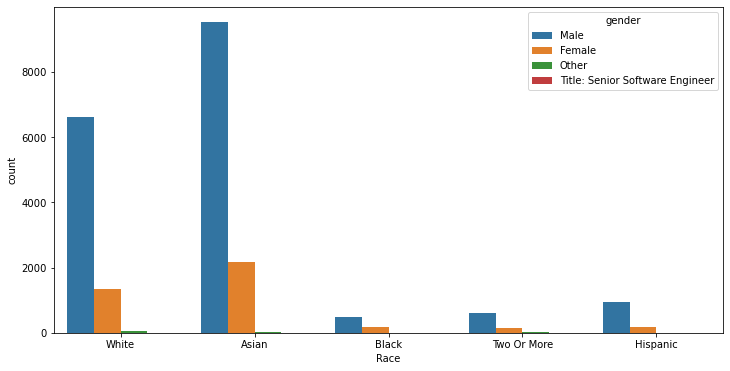

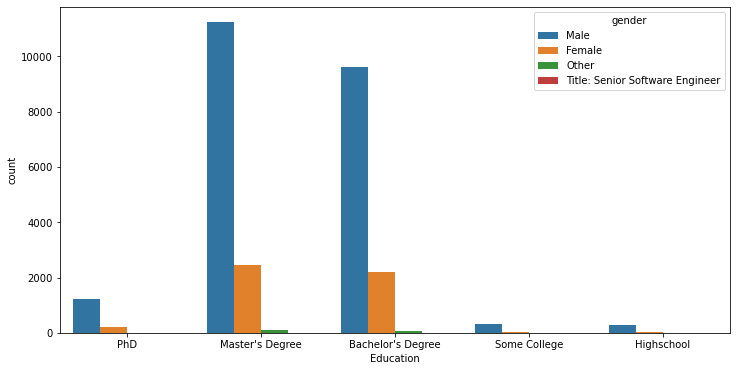

In [34]:
modulos.plotCategoricalVals(df, ['Race', 'Education'], y='gender')

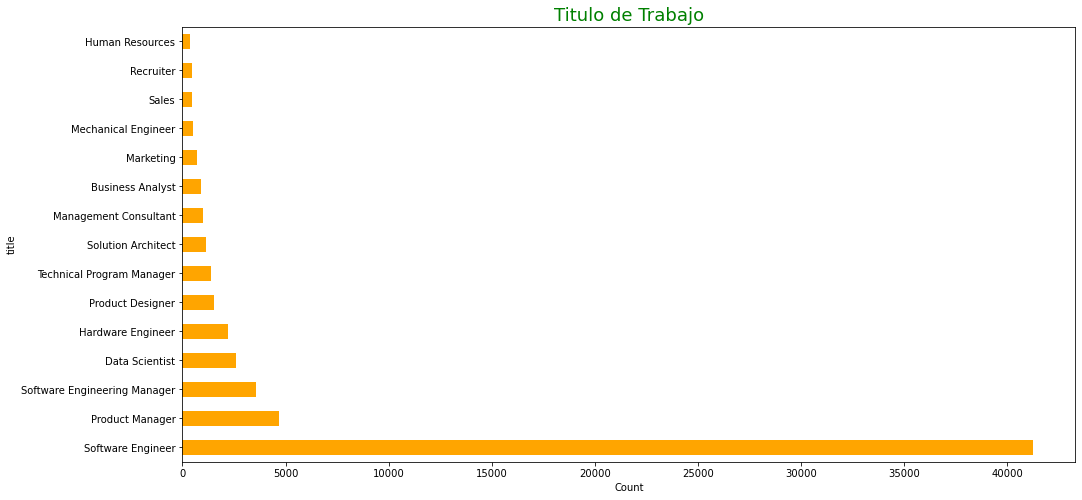

In [41]:
ax = df['title'].value_counts()[:20].plot.barh(figsize=(16, 8), color='orange')
ax.set_title('Titulo de Trabajo', size=18, color='green')
ax.set_ylabel('title', size=10)
ax.set_xlabel('Count', size=10);

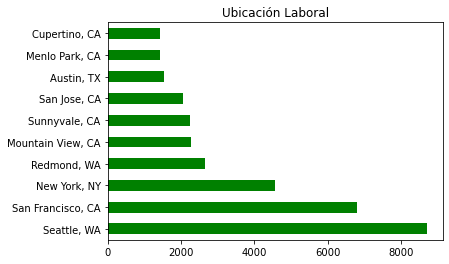

In [40]:
plt.figure(figsize=(6,4))
df["location"].value_counts()[:10].plot.barh(title='Ubicación Laboral', color='green');

#### 2.2 Análisis de Datos Discretos

In [32]:
# Variables discretas:

discrete_vars

['Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic']

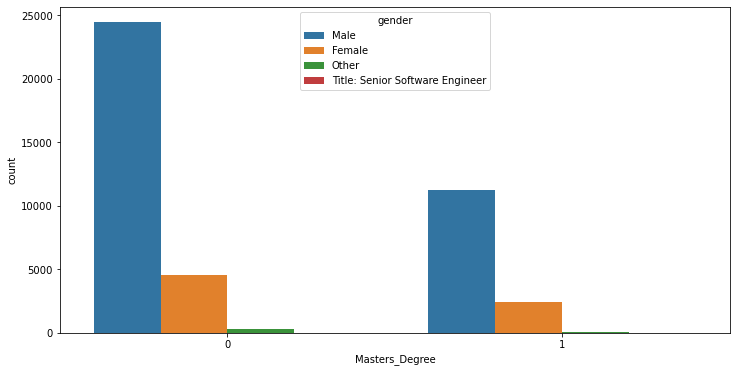

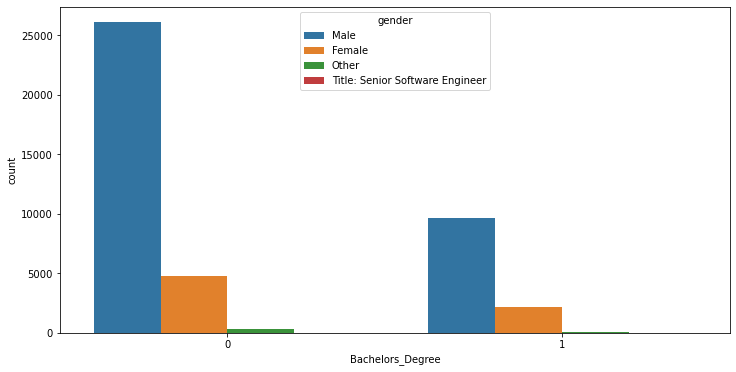

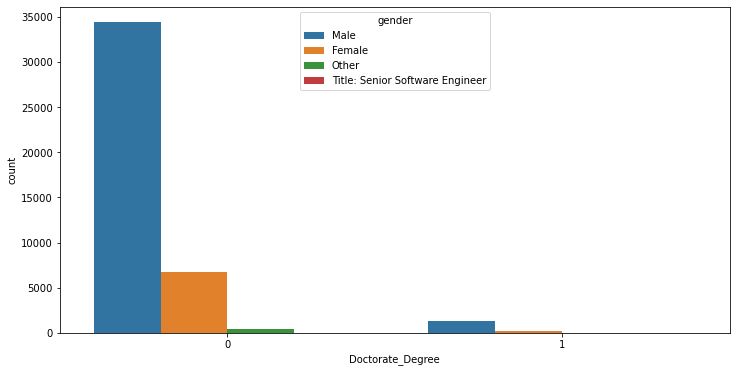

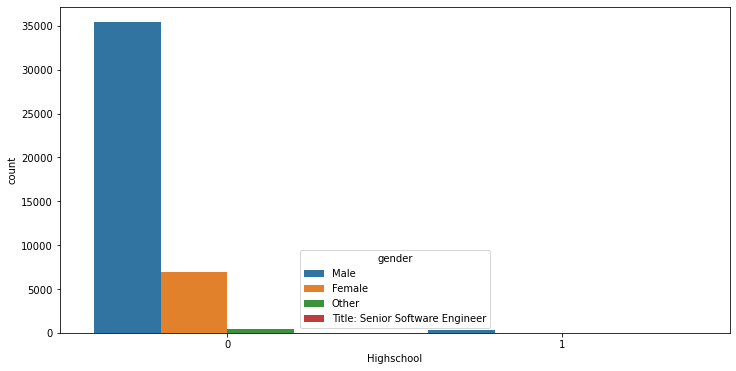

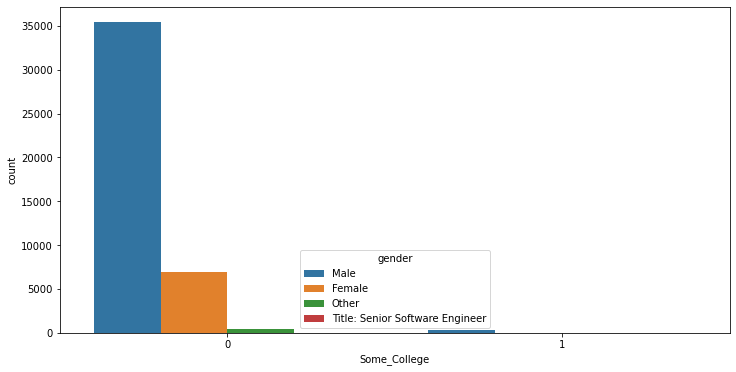

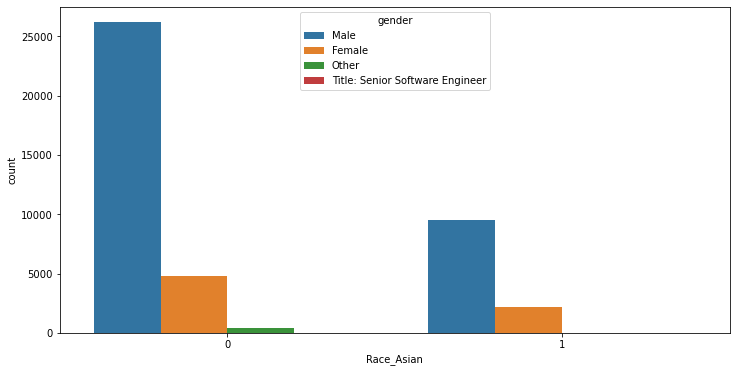

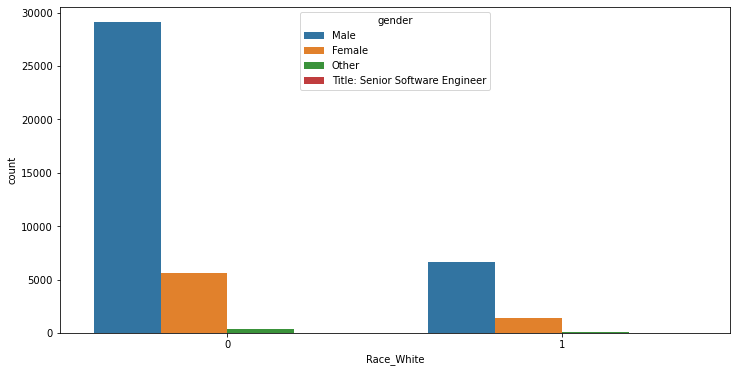

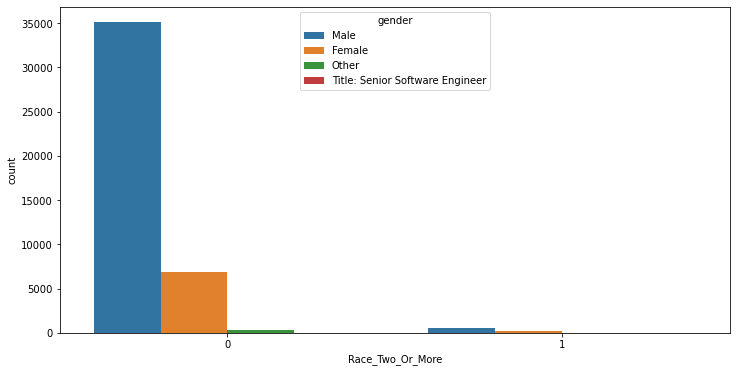

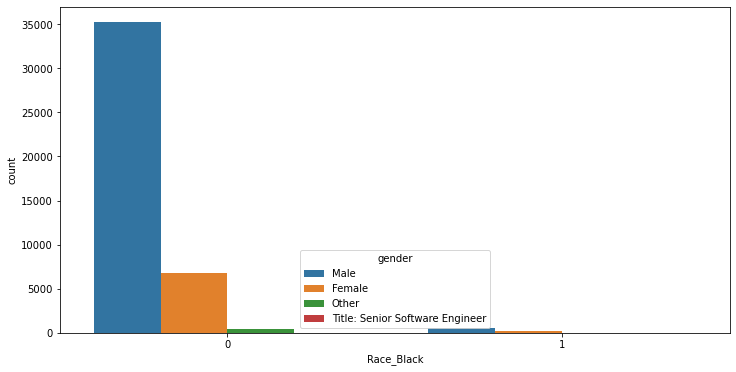

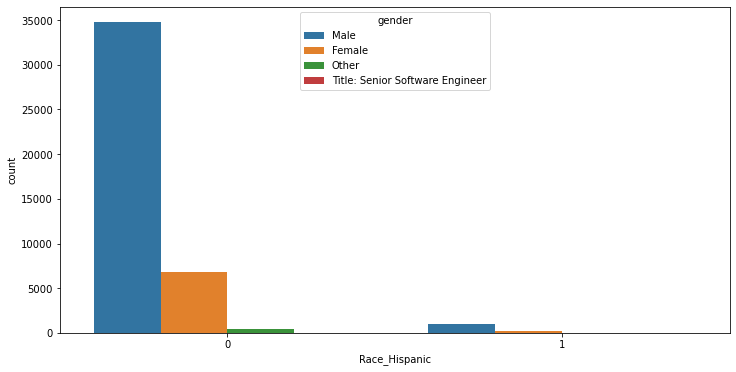

In [33]:
modulos.plotCategoricalVals(df, discrete_vars, y='gender')

#### 2.3 Análisis de Datos Continuos

In [35]:
continues_vars

['totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'basesalary',
 'stockgrantvalue',
 'bonus',
 'cityid',
 'dmaid',
 'rowNumber']

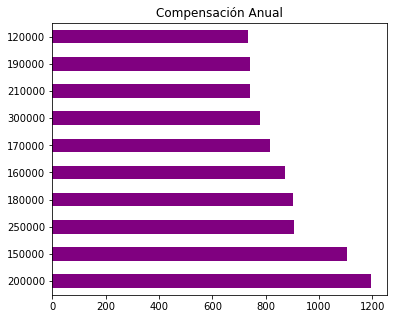

In [47]:
plt.figure(figsize=(6,5))
df["totalyearlycompensation"].value_counts()[:10].plot.barh(title='Compensación Anual', color='purple');

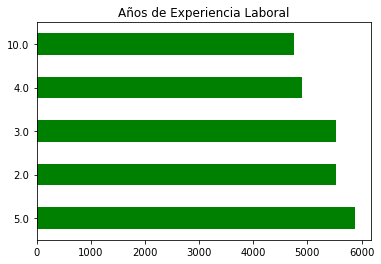

In [43]:
plt.figure(figsize=(6,4))
df["yearsofexperience"].value_counts()[:10].plot.barh(title='Años de Experiencia Laboral', color='green');

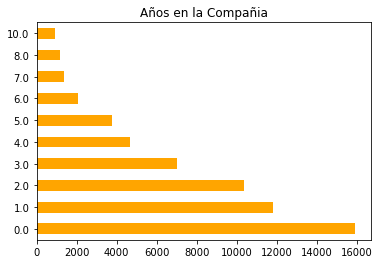

In [44]:
plt.figure(figsize=(6,4))
df["yearsatcompany"].value_counts()[:10].plot.barh(title='Años en la Compañia', color='orange');

#### 2.4 Análisis de Variable Target

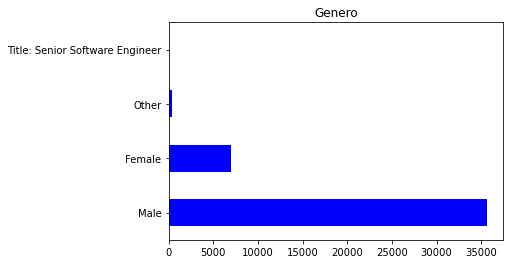

In [53]:
plt.figure(figsize=(6,4))
df["gender"].value_counts().plot.barh(title='Genero', color='blue');

### 3. Selección de Variables

#### 3.1 Variable a Predecir:

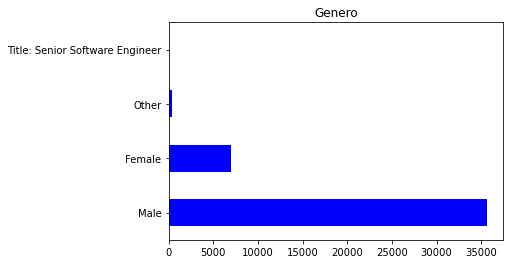

In [54]:
# La Variable a predecir de tipo categórico será la de genero. 

plt.figure(figsize=(6,4))
df["gender"].value_counts().plot.barh(title='Genero', color='blue');

#### 3.2 Variables Predictorias: Variables que se consideran esenciales.

In [ ]:
#Variables que no aportan:

#'timestamp', 'cityid', 'dmaid', 'rowNumber', 'otherdetails'